In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [4]:
df = pd.read_csv("../data/Walmart.csv")
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
ts = df.groupby('Date')['Weekly_Sales'].sum().sort_index()

In [5]:
# Scale data
scaler = MinMaxScaler()
ts_scaled = scaler.fit_transform(ts.values.reshape(-1,1))

In [6]:
def create_sequences(data, lookback=4):
    X, y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

lookback = 4
X, y = create_sequences(ts_scaled, lookback)
X = X.reshape((X.shape[0], X.shape[1], 1))  # LSTM expects 3D input

In [7]:
train_size = len(ts) - 52
X_train, X_test = X[:train_size-lookback], X[train_size-lookback:]
y_train, y_test = y[:train_size-lookback], y[train_size-lookback:]

In [8]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(lookback,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

2026-02-07 10:04:29.802477: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/workspaces/Demand-Forecasting-Project/venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0453 - val_loss: 0.0561
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0367 - val_loss: 0.0467
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0300 - val_loss: 0.0387
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0241 - val_loss: 0.0318
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0204 - val_loss: 0.0260
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0166 - val_loss: 0.0218
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0166 - val_loss: 0.0196
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0165 - val_loss: 0.0189
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0157 - val_loss: 0.0188
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0149 - val_loss: 0.0187
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - val_loss: 0.0190
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0169 - val_loss: 0.0191
E

In [10]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1,1))
y_actual = scaler.inverse_transform(y_test.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


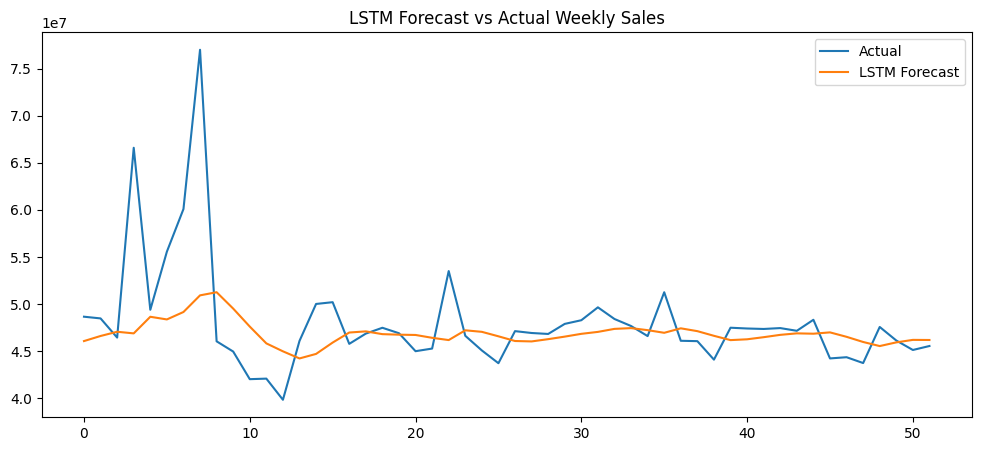

In [11]:
plt.figure(figsize=(12,5))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='LSTM Forecast')
plt.title('LSTM Forecast vs Actual Weekly Sales')
plt.legend()
plt.show()

In [12]:
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mape = mean_absolute_percentage_error(y_actual, y_pred) * 100
print(f"LSTM RMSE: {rmse:.2f}")
print(f"LSTM MAPE: {mape:.2f}%")

LSTM RMSE: 5485446.55
LSTM MAPE: 5.77%


# Compare SARIMA vs LSTM
# SARIMA metrics 
# rmse_sarima, mape_sarima

In [13]:

print(f"SARIMA RMSE: {rmse:.2f}")
print(f"SARIMA MAPE: {mape:.2f}%")

SARIMA RMSE: 5485446.55
SARIMA MAPE: 5.77%


In [14]:
# LSTM metrics
print(f"LSTM RMSE: {rmse:.2f}")
print(f"LSTM MAPE: {mape:.2f}%")

LSTM RMSE: 5485446.55
LSTM MAPE: 5.77%


In [15]:
# Visual comparison
plt.figure(figsize=(12,5))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast.values, label='SARIMA Forecast')
plt.plot(test.index, y_pred, label='LSTM Forecast')
plt.title('SARIMA vs LSTM Forecast vs Actual')
plt.legend()
plt.show()

NameError: name 'test' is not defined

<Figure size 1200x500 with 0 Axes>